# Corridors Dataset Generator

The following code generates the Corridors Dataset. 

---

The Corridors dataset consists of $200.000$ black and white 13x13 images. Each image is divided into two sections, upper and lower, by an horizontal white line of width 1 pixel. Each section includes a vertical noisy "corridor", i.e., a white vertical core segment with white random pixels around it. The white random pixels are independent samples of a Bernoulli distribution $f(g(x;\mu, \sigma))$, where $g(x;\mu, \sigma)$ is a Gaussian probability density function with standard deviation $\sigma=1.2$ and mean $\mu$ equal to the position of the vertical core segment. The position of the vertical core segment, also referred to as the position of the corridor, is an integer number ranging from 0 to 12, since each corridor can slide horizontally from pixel 0 to pixel 12 across images. Thus, each image is associated with two labels, $(x_{UC}, x_{LC})$, where $x_{UC}$ denotes the position of the upper corridor and $x_{LC}$ denotes the position of the lower corridor. The positions of the upper and lower corridors represent the two orthogonal factors of variation of the dataset

---

The code saves the dataset as csv file where each row is a image and the columns are the pixels (169) of that image. The number of columns is 171 ( = 13x13 +2) columns, because the last two columns represent the labels $x_{UC}$ and $x_{LC}$, respectively.

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as ss

def GenMapTwoCorridors(top_corr_mean, bot_corr_mean, n_rows=13, n_cols=13):
    rows = []
    for i,mean in enumerate([top_corr_mean, bot_corr_mean]):
        mu = float(mean)
        sigma = 1.2
        ps = ss.norm(mu,sigma).pdf(np.linspace(0, n_cols-1, n_cols))
        ps = ps/ps.max()

        cols = []
        for p in ps:
            cols.append(np.random.binomial(1, p, size=int((n_rows-1)/2)))

        if np.size(rows) == 0:
            rows = np.array(cols).T
        else:
            rows = np.vstack([rows, np.array(cols).T])

        if i==0:
            rows = np.vstack([rows, np.ones((1, n_cols), dtype=int)])

    rows = 1 - np.array(rows)
    return rows

In [17]:
nSamples = 1000

ds = []
Is = []
Js = []

l = 13

for n in range(nSamples):
    if(n%50000==0):
        print(n)

    i = np.random.randint(0,l)
    j = np.random.randint(0,l)

    Is.append(i)
    Js.append(j)
    
    rows = list(GenMapTwoCorridors(i,j).flatten())
    rows.append(i)
    rows.append(j)

    ds.append(rows[:])

0


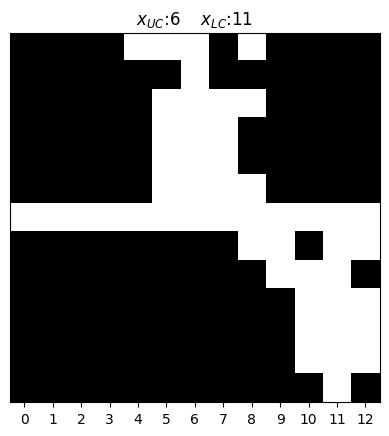

In [36]:
import matplotlib.pyplot as plt

sample = ds[0][:-2]
xuc, xlc = ds[0][-2:]


plt.imshow(np.array(ds[0][:-2]).reshape(13,13), cmap='binary');
plt.title(r'$x_{UC}$:' + f'{xuc}' + r'    $x_{LC}$:' + f'{xlc}')
plt.yticks([]);
plt.xticks(range(13), range(13));

In [ ]:
# Save as csv
# pd.DataFrame(np.array(ds)).to_csv('|mazes.csv', index=False, header=False)